In [ ]:
1.	What is inductive reasoning? Deductive reasoning? Give an example of each, different from the examples given in class. 

Using ONE of the following sources, complete the questions for only that source. 

Credit approval: https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29

Cardiac Arrhythmia: https://archive.ics.uci.edu/ml/datasets/Arrhythmia 

Abalone age: https://archive.ics.uci.edu/ml/datasets/Abalone - this one is a bit harder since it’s not binary like the others, but if you really want to master these concepts, you should pick this one. Use RMSE as a performance metric if you do this as regression. You should target a value of under 3.

Note: at least one of your models should have the most relevant performance metric above .90 . All performance metrics should be above .75 . You will partially be graded on model performance.

2.	Preprocess your dataset. Indicate which steps worked and which didn’t. Include your thoughts on why certain steps worked and certain steps didn’t. 

3.	Create a decision tree model tuned to the best of your abilities. Explain how you tuned it.

4.	Create a random forest model tuned to the best of your abilities. Explain how you tuned it.

5.	Create an xgboost model tuned to the best of your abilities. Explain how you tuned it. 

6.	Which model performed best? What is your performance metric? Why? 


The dataset consists of 14 feature variables and 1 class label that determine the loan approval decision.
All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.
We do not even have the features names but we know the data has continuous or categorical columns. Based on that 
we can similarly label which columns are continuous (N), categorical (C) and if they require further encoding as
(C_enc) in the dataset.

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#  Import SK-Learn Library
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score , classification_report
from sklearn.preprocessing import StandardScaler

In [70]:
data = np.genfromtxt(r'C:\Users\rsagu\Downloads\australian.dat',
                     names='C1, N2, N3, C4_enc, C5_enc, C6_enc, N7, C8, C9, N10, C11, C12_enc, N13, N14, Target',
                     dtype=None,
                     delimiter=' ')
dat_df = pd.DataFrame(data) 
dat_df

,C1,N2,N3,C4_enc,C5_enc,C6_enc,N7,C8,C9,N10,C11,C12_enc,N13,N14,Target
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [93]:
# checking for statistics of the dataset
dat_df.describe()

,C1,N2,N3,C4_enc,C5_enc,C6_enc,N7,C8,C9,N10,C11,C12_enc,N13,N14,Target
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


In [73]:
dat_df.isna().sum()
dat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   C1       690 non-null    int32  
 1   N2       690 non-null    float64
 2   N3       690 non-null    float64
 3   C4_enc   690 non-null    int32  
 4   C5_enc   690 non-null    int32  
 5   C6_enc   690 non-null    int32  
 6   N7       690 non-null    float64
 7   C8       690 non-null    int32  
 8   C9       690 non-null    int32  
 9   N10      690 non-null    int32  
 10  C11      690 non-null    int32  
 11  C12_enc  690 non-null    int32  
 12  N13      690 non-null    int32  
 13  N14      690 non-null    int32  
 14  Target   690 non-null    int32  
dtypes: float64(3), int32(12)
memory usage: 48.6 KB


In [95]:
# splitthe data into features and Target Variables
X = dat_df.iloc[:, :-1].values
y = dat_df.iloc[:, -1].values

### Data Preprocessing: One Hot Encoding & Standardization

In [96]:
# One Hot Encoding the columns: 3, 4, 5, 11
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
        transformers = [('one_hot_encoder', OneHotEncoder(categories = 'auto'),[3, 4, 5, 11])],
        remainder = 'passthrough')

X = ct.fit_transform(X)

# Scaling - Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [97]:
# Splitting dataset into train & test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 1)

3.	Create a decision tree model tuned to the best of your abilities. Explain how you tuned it.

In [ ]:
# As the dataset is a binary classification problem we can build the Binary classification model to predict if the credit
# was approved or rejected to customers.
# First we see the model performance using DecisionTreeClassifier using different parameters.

In [80]:
# Import necessary modules
from sklearn import tree
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV


# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [4, None],
              "max_features": randint(1, 10),
              "min_samples_leaf": randint(1, 10),
              "criterion": ["gini", "entropy"],
             "splitter": ["best", "random"]}

# Instantiate a Decision Tree classifier: tree
tree = tree.DecisionTreeClassifier(random_state=42)

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 4, 'min_samples_leaf': 7, 'splitter': 'best'}
Best score is 0.8622768222768222


 After tuning the model we got the best score to be 86% which turns to be the good model performance.

In [81]:
# Import tree
from sklearn import tree
best_model = tree.DecisionTreeClassifier(criterion ='entropy', max_depth =5, max_features=7,
                                        min_samples_leaf=5, splitter='best', random_state = 42)

In [82]:
# test the model performance
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.94      0.73      0.82        82
           1       0.70      0.93      0.80        56

    accuracy                           0.81       138
   macro avg       0.82      0.83      0.81       138
weighted avg       0.84      0.81      0.81       138



Looking at the precision and recall values we can tell that the model performance is Excellent. 
Also, the time performance for the given set of data is fast.


### 4.	Create a random forest model tuned to the best of your abilities. Explain how you tuned it.

In [83]:

# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)

# define the model
model = RandomForestClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.904 (0.025)


In [84]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=170, random_state = 0)

rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.855072463768116

In [85]:
predictions = rf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87        82
           1       0.79      0.88      0.83        56

    accuracy                           0.86       138
   macro avg       0.85      0.86      0.85       138
weighted avg       0.86      0.86      0.86       138



In [86]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train)

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 0.33


In [87]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4, 
            n_estimators=200,
            random_state=2)

# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 0.355


In [88]:
# This is a good dataset for a first XGBoost model because all of the input variables are numeric and the problem is a 
# simple binary classification problem

In [89]:
#XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

xgb = XGBClassifier()

xgb.fit(X_train, y_train)
print(xgb)

# y_pred = xgb.predict(X_test)
# print(classification_report(y_test, y_pred))

[22:44:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


C:\Users\rsagu\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [90]:
# make predictions for test data
y_pred = xgb.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.33%


In [91]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.8484320557491289


Text(0, 0.5, 'True Positive Rate')

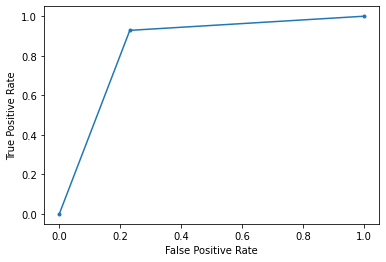

In [92]:
plt.plot(fpr, tpr, marker = '.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")